In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/apple/Desktop/bank-case/data-cleaned.csv')

In [3]:
df.dropna(subset = ['Jan_Repay_Status'], axis = 0, inplace = True)
df.dropna(subset = ['Feb_Repay_Status'], axis = 0, inplace = True)
df.dropna(subset = ['Mar_Repay_Status'], axis = 0, inplace = True)
df.dropna(subset = ['Apr_Repay_Status'], axis = 0, inplace = True)
df.dropna(subset = ['May_Repay_Status'], axis = 0, inplace = True)
df.dropna(subset = ['Jun_Repay_Status'], axis = 0, inplace = True)
df.dropna(subset = ['July_Payment_Status'], axis = 0, inplace = True)

In [4]:
X = df[['Jan_Repay_Status','Feb_Repay_Status','Mar_Repay_Status','Apr_Repay_Status','May_Repay_Status','Jun_Repay_Status']]
y = df['July_Payment_Status']

In [5]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


array([[ 5.44163646,  4.32818095, 10.05117846,  6.2635703 , 11.46181061,
         2.67039791],
       [-0.40725562, -0.35859214, -0.34528086, -0.30695651, -0.280393  ,
        -0.28586454],
       [-0.40725562, -0.35859214, -0.34528086, -0.30695651, -0.280393  ,
        -0.28586454],
       [-0.40725562, -0.35859214, -0.34528086, -0.30695651, -0.280393  ,
        -0.28586454],
       [-0.40725562, -0.35859214, -0.34528086, -0.30695651, -0.280393  ,
        -0.28586454]])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (24372, 6) (24372,)
Test set: (6094, 6) (6094,)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [8]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 0])

In [9]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.75385211, 0.24614789],
       [0.83679605, 0.16320395],
       [0.81855231, 0.18144769],
       ...,
       [0.7380949 , 0.2619051 ],
       [0.83679605, 0.16320395],
       [0.83679605, 0.16320395]])

In [10]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.8053823432884805

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 272 1066]
 [ 120 4636]]


In [12]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[ 272 1066]
 [ 120 4636]]


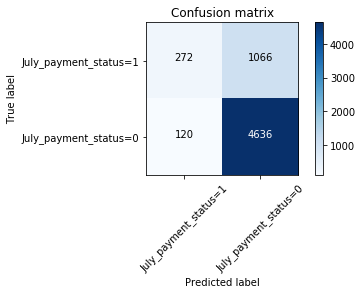

In [13]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['July_payment_status=1','July_payment_status=0'],normalize= False,  title='Confusion matrix')

In [14]:
from sklearn import metrics

In [15]:
mean_acc=metrics.accuracy_score(y_test, yhat)
print( "Logistic's Accuracy:", mean_acc)

Logistic's Accuracy: 0.8053823432884805
